## Different ensemble methods for classification trees

In this notebook, you will use scikit-learn's trees and ensemble methods to compare different 'forests' and their performance on some toy datasets. In particular, you will

1. train single Trees (deterministic and random ones, both greedy and random spilts) on the full data set, and compare performances.
2. train multiple of them using bootstrapped samples of the data. compare performance vs. number of trees used.
3. visualize some of the classifiers in 2d.
4. train vs out ouf bag vs. test error vs. crossvalidation error.


As usual, some setup first:

In [1]:
import numpy as np
import sklearn.tree as sk_tree
import sklearn.ensemble as sk_ensemble
import sklearn.datasets as sk_data
import sklearn.model_selection as sk_cv
import warnings
%matplotlib inline
import matplotlib.pyplot as plt

The data set is a very simple example from scikit_learns datasets submodule. It's two dimensional, so you can visualize the classifiers.

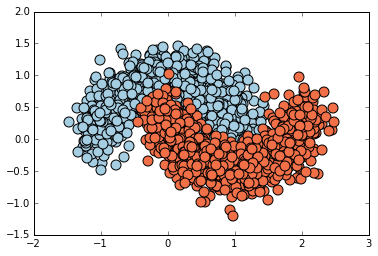

In [2]:
X, Y = sk_data.make_moons(2000, noise=0.2)
# an alternative data sets with more classes, if you feel fancy
# X,Y = sk_data.make_blobs(n_samples=1000, n_features=2, centers=4, center_box=(-4,4))

num_classes = len(np.unique(Y))
cms = plt.cm.Paired   # eine Möglichkeit von Colormap https://gist.github.com/endolith/2719900 (alternative Accent, Dark2 etc.)

for c in range(num_classes):
    idx = (Y == c)
    plt.scatter(X[idx, 0], X[idx,1], c = cms(c/num_classes), s=100)
plt.show()

# print(X.shape)
# print(X)
h=0.01    # grid length mesh grid (default 0,02)
# bereich von kleinstem bis größten mit rechts und links Rand 0.5
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5  # all rows, first column (=x-values)
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5  # all rows, second column (=y-values)
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),   
                     np.arange(y_min, y_max, h))


Here are two convenience functions that let you plot the 'decision boundaries' of a classifiers. The first one will plot all points that would be classified the same in the same color. The second one shows a more complex picture. It overlays all classes with the alpha value determined by the fraction of the samples in a particular leaf. That means, it illustrates the confidence of a tree.
Feel free to use any of them for the remainder of the notebook.


In [3]:
def classification_plot_max(trained_classifier, title):
    fig = plt.figure()
    ax = plt.subplot()

    # ravel flattens mesh-matrix, returns 1d-array 
    # np.c_ concatenation along second (horiz) axis --> (4.000 x 2) matrix
    # predict proba: input X : array-like, shape = [n_samples, n_features] - here (4.000 x 2) --> 2 features 
    # output T : array-like, shape = [n_samples, n_classes] Returns the probability of the sample for each class in the model, where classes are ordered as they are in self.classes_.
    # print("np.c_[xx.ravel(), yy.ravel()].shape", np.c_[xx.ravel(), yy.ravel()].shape)

    probs = trained_classifier.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    
    for c in range(num_classes):
        tmp = np.array((np.argmax(probs, axis=1) == c).reshape(xx.shape), dtype=np.float)
        tmp = cms(tmp)
        ax.imshow(tmp, origin='lower', extent=[np.min(xx), np.max(xx), np.min(yy), np.max(yy)])
        idx = (Y == c)
        ax.scatter(X[idx, 0], X[idx,1], c = cms(c/num_classes), s=10, alpha=0.8)
        if title is not None:
            ax.set_title(title)
    return(fig)


def classification_plot_alpha(trained_classifier, title):
    fig = plt.figure()
    ax = plt.subplot()
    for c in range(num_classes):
        alphas = trained_classifier.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,c].reshape(xx.shape)
        tmp = cms(c/num_classes*np.ones_like(xx))
        tmp[:,:,3] = alphas
        ax.imshow(tmp, origin='lower', extent=[np.min(xx), np.max(xx), np.min(yy), np.max(yy)])
        idx = (Y == c)
        ax.scatter(X[idx, 0], X[idx,1], c = cms(c/num_classes), s=10, alpha=0.8)
        if title is not None:
            ax.set_title(title)
    return(fig)

#classification_plot = classification_plot_alpha
classification_plot = classification_plot_max

Let's look at some simple tree examples:

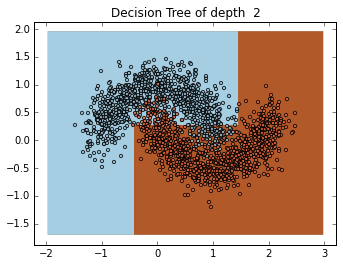

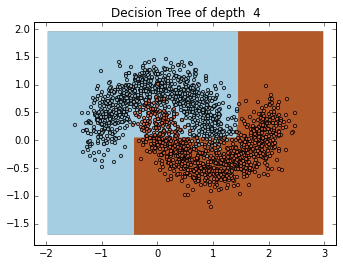

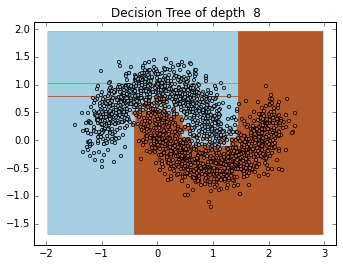

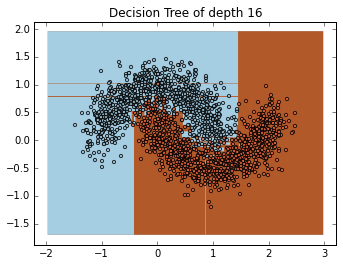

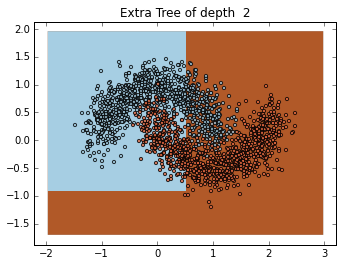

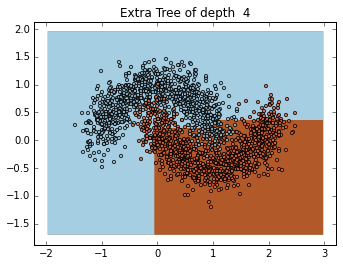

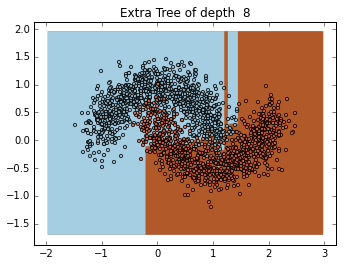

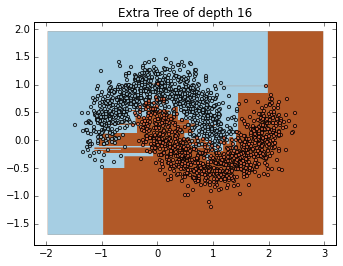

In [4]:
classifiers = [("Decision Tree of depth  2", sk_tree.DecisionTreeClassifier(max_depth=2)),
               ("Decision Tree of depth  4", sk_tree.DecisionTreeClassifier(max_depth=4)),
               ("Decision Tree of depth  8", sk_tree.DecisionTreeClassifier(max_depth=8)),
               ("Decision Tree of depth 16", sk_tree.DecisionTreeClassifier(max_depth=16)),
               ("Extra Tree of depth  2", sk_tree.ExtraTreeClassifier(max_depth=2)),
               ("Extra Tree of depth  4", sk_tree.ExtraTreeClassifier(max_depth=4)),
               ("Extra Tree of depth  8", sk_tree.ExtraTreeClassifier(max_depth=8)),
               ("Extra Tree of depth 16", sk_tree.ExtraTreeClassifier(max_depth=16))
            ]

for name, classifier in classifiers:
    classifier.fit(X,Y)
    classification_plot(classifier, name)
plt.show()
    

Now it's your turn to draw similar pictures for the following classifiers:
1. bagged classification trees
2. random forests
3. extra trees

All are accessible in scikit learn.

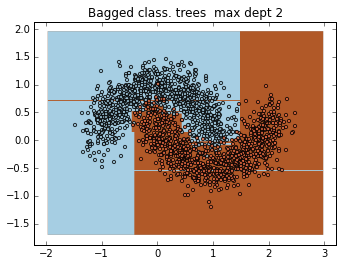

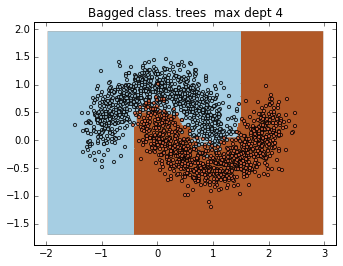

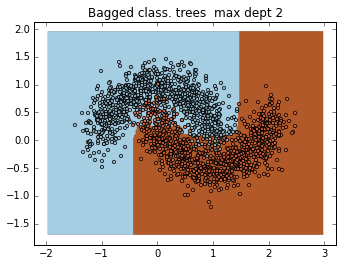

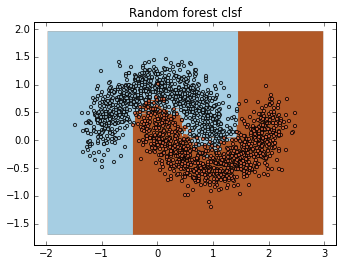

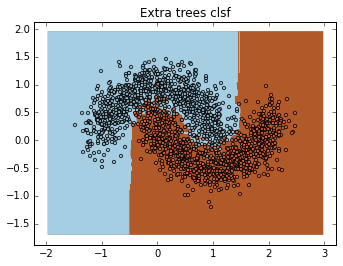

In [5]:
from sklearn.tree import DecisionTreeClassifier

# sk_ensemble included above class 
# take all features (as we have only 2!)
# 
classifiers = [("Bagged class. trees  max dept 2", sk_ensemble.BaggingClassifier(DecisionTreeClassifier(max_depth=20), 
                             n_estimators = 1, max_samples=0.5, max_features=1.0)),
               ("Bagged class. trees  max dept 4", sk_ensemble.BaggingClassifier(DecisionTreeClassifier(max_depth=20), 
                             n_estimators = 10, max_samples=0.5, max_features=1.0)),
               ("Bagged class. trees  max dept 2", sk_ensemble.BaggingClassifier(DecisionTreeClassifier(max_depth=4), 
                             n_estimators = 20, max_samples=0.5, max_features=1.0)),
               ("Random forest clsf", sk_ensemble.RandomForestClassifier(max_depth=12,
                             n_estimators = 20, max_features=1.0)),
               ("Extra trees clsf", sk_ensemble.ExtraTreesClassifier(max_depth=12,
                             n_estimators = 20, max_features=1.0))
              
              
              
              
              ]

for name, classifier in classifiers:
    classifier.fit(X,Y)
    classification_plot(classifier, name)
plt.show()

Let's see how the ensemble methods generalize and how the out of bag error estimates the validation error. To make things a bit more interesting, we shall use a higher dimensional problem with more classes and more features.

In [6]:
X,Y = sk_data.make_classification(10000, n_features=20, n_classes = 4, n_informative = 4)
X_train, X_test, Y_train, Y_test = sk_cv.train_test_split(X, Y, test_size=0.33, random_state=42)

In [7]:
import warnings
num_trees = [2*i for i in range(1,20)]   # in viererschritten laufen, um Rechenzeit zu begrenzen 
accuracies = []
for nt in num_trees:
    # Sometimes not every input point was 'out of bag' and scikit learn raises a warning when computing the OOB-score.
    # This just supresses this warning to unclutter the notebook.
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        rf = sk_ensemble.RandomForestClassifier(n_estimators=nt, bootstrap=True, oob_score=True, random_state=42)
        rf.fit(X_train, Y_train)
    accuracies.append((rf.score(X_train, Y_train), rf.score(X_test, Y_test), rf.oob_score_))

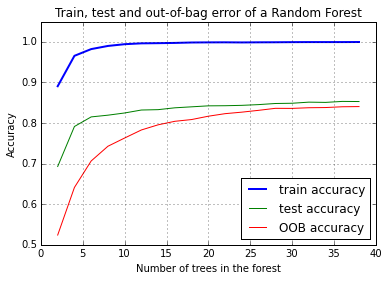

In [8]:
accuracies = np.array(accuracies)
plt.plot(num_trees, accuracies[:,0], label='train accuracy', linewidth=2)
plt.plot(num_trees, accuracies[:,1], label='test accuracy')
plt.plot(num_trees, accuracies[:,2], label='OOB accuracy')
plt.ylim([0.5,1.05])
plt.title("Train, test and out-of-bag error of a Random Forest")
plt.xlabel("Number of trees in the forest")
plt.ylabel("Accuracy")
plt.grid('on','both')
plt.legend(loc=4)
plt.show()

### Question:

What are advantages/disadvantages of using the out-of-bag error rather than the 'traditional' train/test split?

Now let's apply this to a 'real' dataset and investigate some more. In the cell below, the iris data set is loaded. Add code to compute:
1. the training error
2. the test error
3. the out of bag error
4. a crossvalidation estimate of the error using 4-fold CV

for different numbers of trees.

Create plots similar to the one above for a random forests and extra trees. What do you observe?

In [9]:
# We use the Iris data from the first exercise sheet
X_train = np.loadtxt('iris_train.data', delimiter=' ', dtype=float)
Y_train = np.loadtxt('iris_train.labels', dtype=int)
X_test = np.loadtxt('iris_test.data', delimiter=' ', dtype=float)
Y_test = np.loadtxt('iris_test.labels', dtype=int)

# Insert code below!